> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The goal of this project is to analyze appointment data to understand the patterns and factors influencing no-shows in appointments. By identifying these patterns, we can provide actionable insights to improve scheduling efficiency and reduce no-show rates, which can help organizations save time and resources. 

This analysis will involve cleaning the dataset, conducting exploratory data analysis (EDA), and drawing conclusions based on the results. Key visualizations and statistical summaries will be used to support the findings and answer the research questions.

### Dataset Description 

The dataset contains information about patient appointments, with a focus on whether or not the patient showed up for their scheduled appointment (No-show).       
1. Key columns include 'ScheduledDay' (date the appointment was booked), 'AppointmentDay' (date of the appointment), 'No-show' (indicating if the patient attended), and 'Age' (patient's age). 
2. Other columns like 'Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', and 'SMS_received' provide demographic and health-related details that may influence appointment attendance.   
3. 'Handcap' and 'DaysDifference' columns help track patient conditions and the time gap between scheduling and the appointment.    
4. The dataset consists of a single table with no direct relationships to other tables, but each column represents a feature that could affect the likelihood of a patient showing up for an appointment.


### Question(s) for Analysis


- Question 1: What factors influence the likelihood of attending an appointment (No-show = 0), including Gender, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, Age, and DaysDifference (the gap between ScheduledDay and AppointmentDay)?

- Question 2: What are the top 3 features that have the greatest impact on the likelihood of missing an appointment (No-show = 1)?

The goal of this step is to set up the environment and import necessary libraries for data manipulation and visualization.

Expected outcomes:	
- Pandas for handling data
- Matplotlib for plotting graphs
- Matplotlib inline for displaying plots within the notebook
- GGplot style applied for better visualization aesthetics

In [33]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.algorithms import duplicated

%matplotlib inline

plt.style.use('ggplot')

<a id='wrangling'></a>
## Data Wrangling

The goal of this step is to load the dataset and perform initial data inspection, including checking for missing values, duplicates, and invalid entries. The expected outcomes are an overview of the dataset's shape, data types, missing values, basic statistics, and any issues with the data such as duplicates or incorrect values in specific columns.

In [58]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.

# Load dataset and show the first few rows
global df 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

# Check size of dataframe
print("Dataset shape: ",df.shape)

# Inspect the data types of each column
df.info()

# Check for any missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values per column: ", missing_values)

# View some basic statistics
df.describe()

# Check for duplicated rows
duplicated_rows = df.duplicated().sum()
print("\n Number of duplicated rows: ", duplicated_rows)

# Check "Gender" column for invalid values
invalid_gender = df[~df['Gender'].isin(['F', 'M'])]
if not invalid_gender.empty:
    print("\nInvalid gender: \n", invalid_gender)

# Check 'Age' column for negative values
negative_age = df[df['Age'] < 0]
if not negative_age.empty:
    print("\nInvalid age: \n", negative_age)

Dataset shape:  (110527, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB

Missing values per column:  PatientId         0
AppointmentI


### Data Cleaning
The goal of this step is to clean the dataset by removing duplicates, handling missing values, and converting date columns to datetime format. The expected outcome is a cleaned dataset with no duplicates, proper datetime columns, and no missing values in critical columns, ready for further analysis.
 

In [59]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Remove duplicate rows
df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", df.shape[0])

# Handle missing values for 'Age' by replacing them with the median
# df['age'] = df['age'].fillna(df['age'].median())

# Convert 'release_date' to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Confirm there are no more missing values in critical columns
print("\nMissing values after cleaning:\n", df.isnull().sum())

# Chuyển đổi ScheduledDay và AppointmentDay thành kiểu datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Reset index
df.reset_index(drop=True, inplace=True)

def calculate_days_difference():
    global DaysDifference  # Declare the variable as global

    # Convert ScheduledDay and AppointmentDay to datetime format
    df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
    df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

    # Calculate the day difference between ScheduledDay and AppointmentDay and assign it to the global variable
    DaysDifference = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

    # Calculate the day difference between ScheduledDay and AppointmentDay and assign it to the DataFrame
    df['DaysDifference'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Display final structure and a few rows to verify the cleaning steps
print("\nFinal structure of the DataFrame:")
df.info()
df.head()

Number of rows after removing duplicates: 110527

Missing values after cleaning:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Final structure of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourh

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What factors influence the likelihood of attending an appointment (No-show = 0), including Gender, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, Age, and DaysDifference (the gap between ScheduledDay and AppointmentDay)?

The goal of this step is to calculate statistical measures (Chi2 Stat, P-value, T-statistic, and T-test P-value) to evaluate the significance of features. The expected result is to obtain these values for each feature, which will help identify the most influential factors for the analysis.

- Chi2 Stat and P-value are used for categorical variables, indicating the association between the feature and the target variable. A lower P-value (usually less than 0.05) suggests a significant relationship.   
- T-statistic and T-test P-value are used for continuous variables, indicating the significance of the mean difference between groups. The values show that features like "Age" and "DaysDifference" have a significant T-statistic, while "Gender" and "Alcoholism" show no significant relationship.

In [60]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Convert "No-show" to binary: 0 = attended on time, 1 = did not attend
df['No-show'] = df['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create a list to store test results
test_results = []

# Chi-square test function for categorical variables
def chi2_test(feature):
    contingency_table = pd.crosstab(df[feature], df['No-show'])
    chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
    return chi2_stat, p_value

# T-test function for continuous variables
def t_test(feature):
    group_0 = df[df['No-show'] == 0][feature]
    group_1 = df[df['No-show'] == 1][feature]
    t_stat, p_value = stats.ttest_ind(group_0, group_1)
    return t_stat, p_value

# Categorical variables (use chi-square test)
categorical_features = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
for feature in categorical_features:
    chi2_stat, p_value = chi2_test(feature)
    test_results.append({
        'Feature': feature,
        'Chi2 Stat': chi2_stat,
        'P-value': p_value,
        'T-statistic': '-',
        'T-test P-value': '-'
    })

# Continuous variables (use T-test)
calculate_days_difference()
# print(DaysDifference)
continuous_features = ['Age', 'DaysDifference']

for feature in continuous_features:
    t_stat, p_value = t_test(feature)
    test_results.append({
        'Feature': feature,
        'Chi2 Stat': '-',
        'P-value': '-',
        'T-statistic': t_stat,
        'T-test P-value': p_value
    })

# Convert results to DataFrame
global result_df 
result_df = pd.DataFrame(test_results)

# Display results
print('*' * 100)
print(result_df)
print('*' * 100)

****************************************************************************************************
          Feature    Chi2 Stat   P-value T-statistic T-test P-value
0          Gender     1.853437  0.173384           -              -
1     Scholarship    93.577197       0.0           -              -
2    Hipertension   140.651443       0.0           -              -
3        Diabetes    25.322609       0.0           -              -
4      Alcoholism      0.00188  0.965419           -              -
5         Handcap     7.034584  0.134072           -              -
6    SMS_received  1766.067657       0.0           -              -
7             Age            -         -    20.08965            0.0
8  DaysDifference            -         -  -63.015386            0.0
****************************************************************************************************


Here’s a brief analysis of the statistical results:

- Gender: The Chi2 statistic (1.85) and P-value (0.17) suggest that there is no significant relationship between gender and the target variable.
- Scholarship, Hypertension, Diabetes, and SMS_received: These features show very high Chi2 statistics and P-values of 0.0, indicating strong and statistically significant associations with the target variable.
- Alcoholism: The Chi2 statistic is very low (0.00188) with a high P-value (0.97), suggesting no significant relationship with the target variable.
- Handcap: With a Chi2 statistic of 7.03 and a P-value of 0.13, there is no significant relationship between the handicap feature and the target variable.
- Age: The T-statistic (20.09) and P-value (0.0) indicate a significant relationship between age and the target variable.
- DaysDifference: The T-statistic (-63.02) and P-value (0.0) indicate a highly significant relationship with the target variable, suggesting that the number of days between scheduled and appointment days is an important factor.

### Research Question 2: What are the top 5 features that have the greatest impact on the likelihood of missing an appointment (No-show = 1)?

The goal of this step is to filter and rank features based on their statistical significance (P-value or T-test P-value) and impact on the target variable. The expected result is a list of the top 5 features with the greatest impact on the likelihood of missing an appointment, followed by visual plots to show their relationship with the target.

Top 5 features that have the greatest impact on the likelihood of missing an appointment:
          Feature  Impact Score
6    SMS_received   1766.067657
2    Hipertension    140.651443
1     Scholarship     93.577197
8  DaysDifference     63.015386
3        Diabetes     25.322609
Plotting for feature: SMS_received


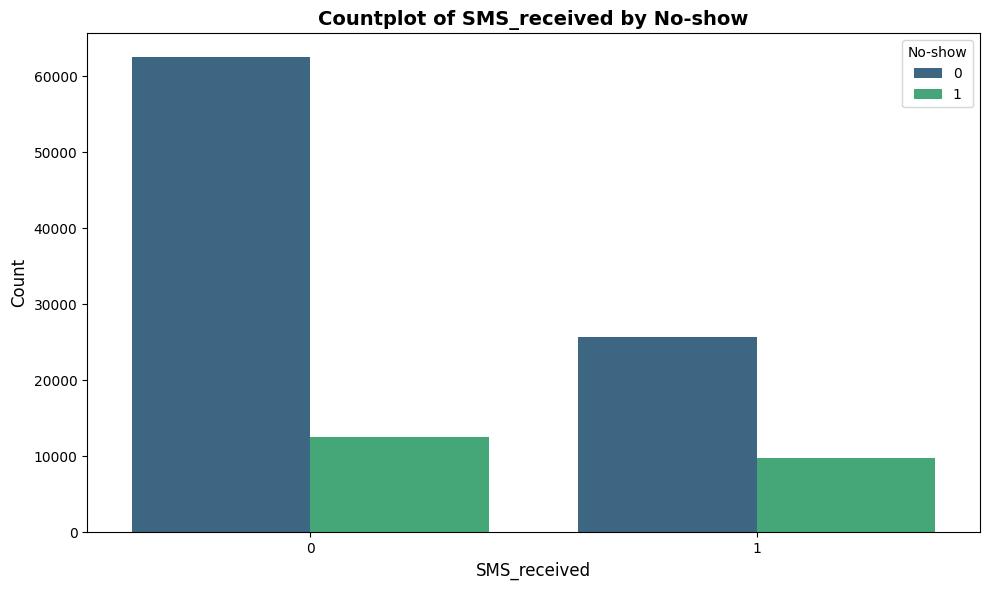

Plotting for feature: Hipertension


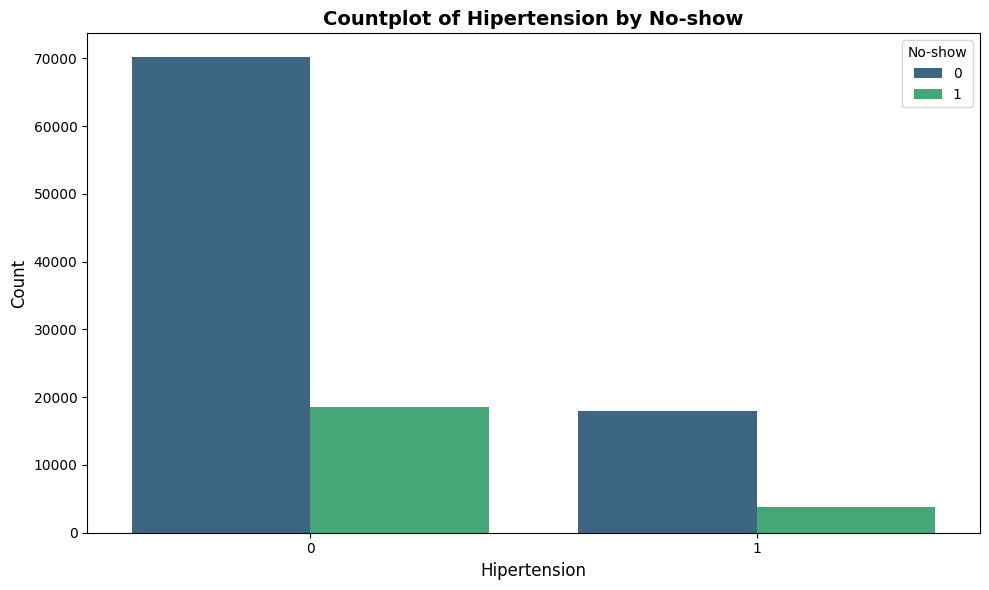

Plotting for feature: Scholarship


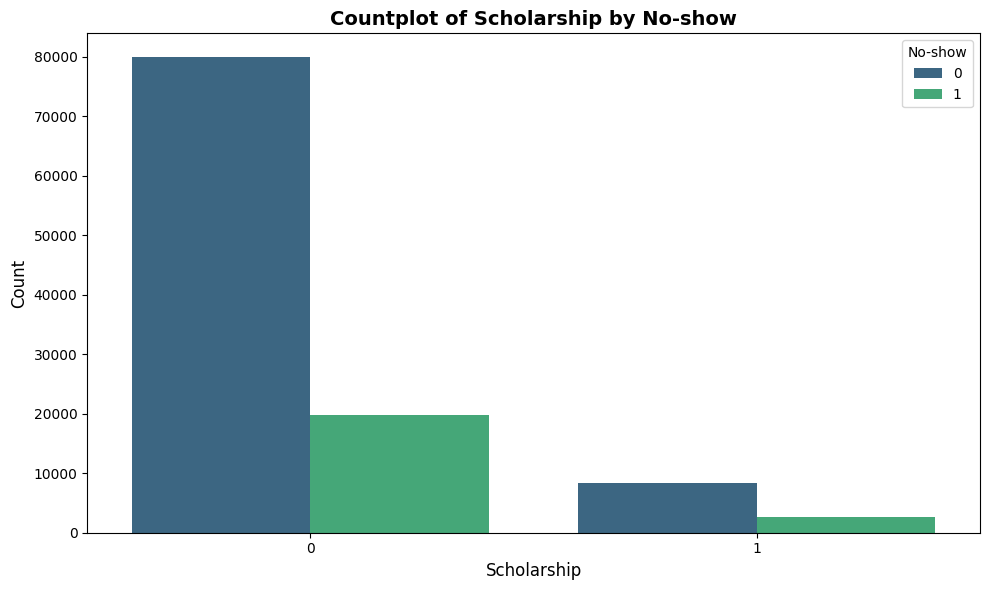

Plotting for feature: DaysDifference


C:\Users\Thao Ho\AppData\Local\Temp\ipykernel_19048\527655169.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=feature, palette="Set2")


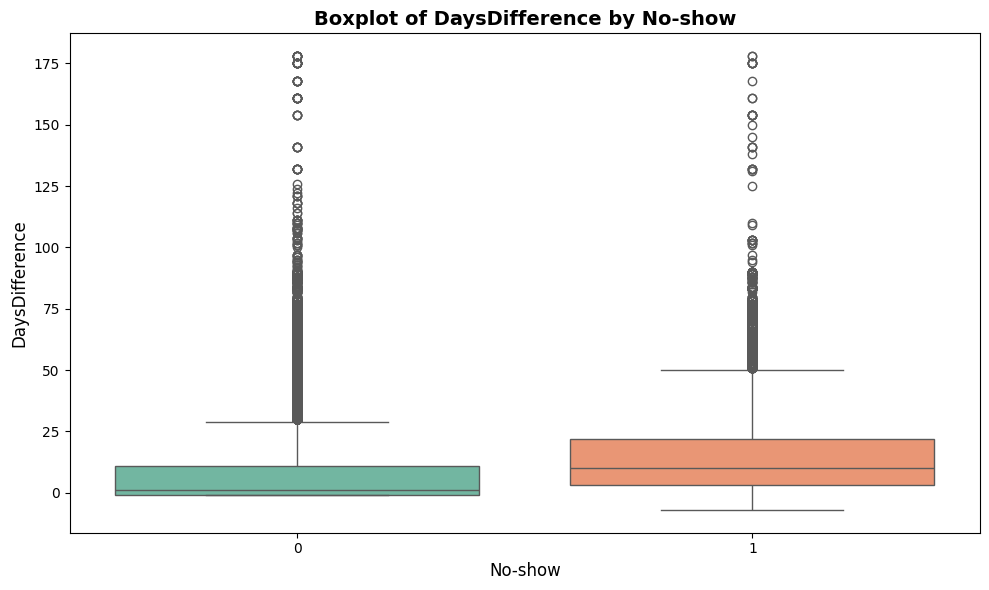

Plotting for feature: Diabetes


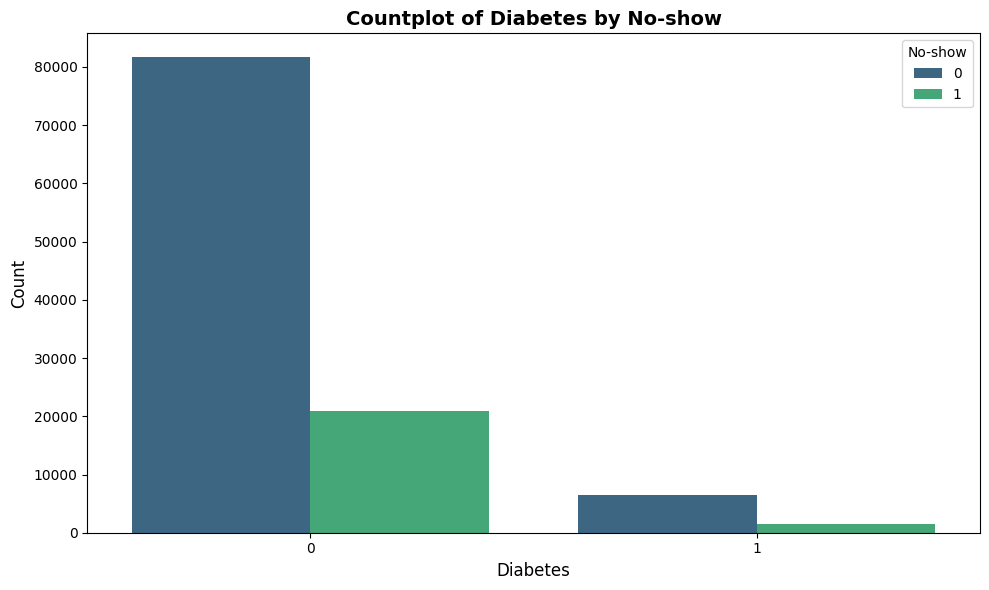

In [61]:
# Continue to explore the data to address your additional research 
#   questions. Add more headers as needed if you have more questions to
#   investigate.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove features without statistical value (Chi2 or T-statistic)
result_df['Chi2 Stat'] = pd.to_numeric(result_df['Chi2 Stat'], errors='coerce')
result_df['T-statistic'] = pd.to_numeric(result_df['T-statistic'], errors='coerce')

# Create an "Impact Score" column based on the absolute value of Chi2 Stat or T-statistic
result_df['Impact Score'] = result_df['Chi2 Stat'].fillna(0) + result_df['T-statistic'].abs().fillna(0)

# Filter features with valid P-value or T-test P-value (< 0.05)
result_df['P-value'] = pd.to_numeric(result_df['P-value'], errors='coerce')
result_df['T-test P-value'] = pd.to_numeric(result_df['T-test P-value'], errors='coerce')
df_significant = result_df[(result_df['P-value'] < 0.05) | (result_df['T-test P-value'] < 0.05)]

# Sort by "Impact Score" in descending order
df_top_features = df_significant.sort_values(by='Impact Score', ascending=False).head(5)

# Print the top 5 features
print("Top 5 features that have the greatest impact on the likelihood of missing an appointment:")
print(df_top_features[['Feature', 'Impact Score']])


def plot_feature_relationship(data, feature, target="No-show", plot_type="boxplot", figsize=(10, 6)):
    """
    Plot a comparison between a feature and No-show (0 or 1).
    
    Parameters:
    - data (pd.DataFrame): Input data containing the feature and target columns.
    - feature (str): Name of the feature to compare.
    - target (str): Name of the target column (default is 'No-show').
    - plot_type (str): Type of plot to draw ('boxplot', 'barplot', 'countplot').
    - figsize (tuple): Size of the plot.
    """
    plt.figure(figsize=figsize)

    if plot_type == "boxplot":
        sns.boxplot(data=data, x=target, y=feature, palette="Set2")
        plt.title(f"Boxplot of {feature} by {target}", fontsize=14, weight='bold')
        plt.xlabel(target, fontsize=12)
        plt.ylabel(feature, fontsize=12)

    elif plot_type == "barplot":
        sns.barplot(data=data, x=target, y=feature, palette="coolwarm", ci=None)
        plt.title(f"Barplot of {feature} by {target}", fontsize=14, weight='bold')
        plt.xlabel(target, fontsize=12)
        plt.ylabel(f"Average {feature}", fontsize=12)

    elif plot_type == "countplot":
        sns.countplot(data=data, x=feature, hue=target, palette="viridis")
        plt.title(f"Countplot of {feature} by {target}", fontsize=14, weight='bold')
        plt.xlabel(feature, fontsize=12)
        plt.ylabel("Count", fontsize=12)

    else:
        raise ValueError("Invalid plot_type. Choose from 'boxplot', 'barplot', 'countplot'.")

    plt.tight_layout()
    plt.show()

# Create a list of features from df_top_features
top_features = df_top_features["Feature"].tolist()

# Loop through each feature in the list and plot the appropriate chart
for feature in top_features:
    print(f"Plotting for feature: {feature}")
    
    # Use countplot for categorical columns
    if df[feature].nunique() <= 10:  # If the column has <= 10 unique values
        plot_feature_relationship(data=df, feature=feature, target="No-show", plot_type="countplot")
    
    # Use boxplot for continuous numerical columns
    else:
        plot_feature_relationship(data=df, feature=feature, target="No-show", plot_type="boxplot")

#### The top 5 features with the greatest impact on the likelihood of missing an appointment are:

1. SMS_received: This feature has the highest impact score, indicating that receiving an SMS reminder significantly influences appointment attendance.
2. Hipertension: The presence of hypertension also has a strong impact, suggesting that patients with hypertension are more likely to miss their appointments.
3. Scholarship: Receiving a scholarship has a notable effect, possibly reflecting financial barriers or incentives for attending appointments.
4. DaysDifference: The number of days between scheduling and appointment shows a strong impact, implying that the timing of the appointment affects attendance.
5. Diabetes: Diabetes also has an impact, indicating that patients with diabetes are more likely to miss their appointments.
The analysis focuses on SMS_received as the feature with the highest impact on attendance.

- ##### Countplot of SMS_received by No-show
The countplot shows that most appointments did not receive SMS reminders, as indicated by the high count for "0" in the SMS_received column. Among those who received an SMS, the number of missed appointments (No-show = 1) is lower. This suggests that SMS reminders help reduce the likelihood of missed appointments.

- ##### Countplot of Hipertension SMS_received
The number of patients without hypertension who attended their appointments (No-show = 0) is significantly higher than the number of patients who did not attend (No-show = 1).

- ##### Countplot of Hipertension SMS_received
The chart shows the difference in the number of days between two groups: the non-missed group (0) and the missed group (1).     
The missed group (1) has a higher number of days compared to the non-missed group (0), with more outliers.  
This indicates that people with larger differences in the number of days tend to miss appointments more frequently. 


<a id='conclusions'></a>
## Conclusions

### Conclusions: Factors Affecting On-Time Attendance (No-show)
#### Strongly Influencing Factors:

- Scholarship: Individuals without scholarships are more likely to attend on time.  
- Hypertension: People with hypertension tend to attend appointments on time more frequently.   
- Diabetes: Patients with diabetes are more likely to attend on time.   
- SMS_received: Receiving SMS reminders increases the likelihood of on-time attendance. 
- Age: Older individuals are more likely to attend their appointments on time.  

#### Moderately Influencing Factor:
- Handicap: The presence of a handicap has a moderate influence on on-time attendance.

#### Weak or No Impact:
- Gender: Gender does not significantly affect the likelihood of attending appointments on time.    
- Alcoholism: Non-alcoholics tend to attend on time, but this factor has a weaker impact compared to others.    
- DaysDifference: A significant negative impact on the likelihood of attending an appointment. The greater the gap between the scheduled day and the appointment day, the less likely patients are to attend on time.   

### Conclusion on No-show (Missed Appointments)
#### The top 5 features that influence the likelihood of missing an appointment (No-show = 1) are:
- SMS_received  
- Hipertension   
- Scholarship    
- DaysDifference    
- Diabetes          

#### Suggested Actions
Increase Reminders: Focus on sending more reminders, especially SMS reminders, for patients who have a longer gap between the scheduled and appointment days.

Targeted Programs: Implement targeted programs to improve appointment adherence for individuals with Scholarship, Hypertension, and Diabetes.

By addressing these factors, healthcare providers can potentially improve attendance rates and reduce no-shows.


## Limitations
However, our analysis faced several limitations:

Data Quality and Completeness:
- We lacked detailed information on the specific reasons for patient no-shows, limiting the ability to propose tailored solutions.

Lack of External Data:
- The dataset did not include factors such as economic status, precise geographical distance to healthcare facilities, or patient psychology, all of which could significantly influence no-show rates.

Limited Analytical Models:
- The scope of the project primarily focused on exploratory data analysis (EDA), with results being descriptive rather than rigorously validated by predictive models or complex statistical methods.

Generalizability of Results:
- The findings are specific to this dataset and may not be generalizable to other healthcare organizations or broader populations.

In [63]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 507161 bytes to Investigate_a_Dataset.html
